Dowload and explore GAM data

**Data Reference:**
Beagrie, R. A., Scialdone, A., Schueler, M., Kraemer, D. C., Chotalia, M., Xie, S. Q., ... & Pombo, A. (2017). Complex multi-enhancer contacts captured by genome architecture mapping. Nature, 543(7646), 519-524.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/GSE64881_segmentation_at_30000bp.passqc.multibam (1).csv')
df

,chrom,start,stop,F10A2,F10A3,F10A4,F10A5,F10A6,F10B1,F10B2,...,F9F2,F9F3,F9F4,F9F5,F9F6,F9G1,F9G2,F9G3,F9G4,F9G5
0,chr1,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1,30000,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,60000,90000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,90000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,120000,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,chr4_random,150000,160594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90873,chr3_random,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90874,chr3_random,30000,41899,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90875,chrM,0,16299,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


1.	Number of genomic windows = 90877

2.	Number of Nuclear Profiles (NPs) = 411-3 = 408 (removing chrom , start and stop)

In [ ]:
df_new = df.drop(['chrom','start','stop'], axis=1)

Calculating column sum

In [ ]:
df_window_count = df_new.sum(axis=0)
print(df_window_count.mean())
print(df_window_count.min())
print(df_window_count.max())

In [ ]:
df_window_count

F10A2    5877
F10A3    7566
F10A4    4948
F10A5    3831
F10A6     836
         ... 
F9G1     2367
F9G2     3560
F9G3     3426
F9G4     2035
F9G5     5650
Length: 408, dtype: int64

Calculating row sum

In [ ]:
df_np_count = df_new.sum(axis=1)
print(df_np_count)
print(df_np_count.mean())
print(df_np_count.min())
print(df_np_count.max())


**Calculating radial position and compaction**

Radial position of each NP

In [ ]:
import numpy as np
column_sum_list = list(df_window_count)
column_names = list(df_new.columns)
np.quantile(column_sum_list,[0.2, 0.4, 0.6, 0.8, 1])
dict = {'Key1':[],'Key2':[],'Key3':[],'Key4':[],'Key5':[]}
for ind,item in enumerate(column_sum_list):
  if (item < 2665):
    dict['Key1'].append(column_names[ind])
  elif (item>=2665 and item<4209.6):
    dict['Key2'].append(column_names[ind])
  elif (item>=4209 and item<5668):
    dict['Key3'].append(column_names[ind])
  elif (item>=5668 and item<7834):
    dict['Key4'].append(column_names[ind])
  elif (item>=7834):
    dict['Key5'].append(column_names[ind])

In [ ]:
print(len(dict['Key1']+dict['Key2']+dict['Key3']+dict['Key4']+dict['Key5']))
print(dict['Key1'])

408
['F10A6', 'F10B1', 'F10C2', 'F10D6', 'F10E1', 'F10F6', 'F10G5', 'F11C4', 'F12B2', 'F12C4', 'F12D5', 'F12E6', 'F12G3', 'F12G4', 'F15A8', 'F15C1', 'F15C5', 'F15C8', 'F15D3', 'F15D4', 'F15F2', 'F15G1', 'F15G3', 'F15G4', 'F16B5', 'F16D4', 'F16G3', 'F17A2', 'F17B2', 'F17B3', 'F17B6', 'F17C6', 'F17E2', 'F17E4', 'F17E5', 'F17E7', 'F17F1', 'F17F4', 'F17G1', 'F17G4', 'F18A1', 'F18E3', 'F18F3', 'F18F4', 'F18G3', 'F18G4', 'F5A4', 'F5B3', 'F5D3', 'F5E2', 'F5F2', 'F6B3', 'F6B4', 'F6F3', 'F7A1', 'F7A2', 'F7C2', 'F7C6', 'F7D3', 'F7E1', 'F8B1', 'F8B4', 'F8B6', 'F8D1', 'F8D6', 'F8F1', 'F8F2', 'F8G3', 'F9A6', 'F9B1', 'F9B3', 'F9C2', 'F9C5', 'F9D1', 'F9D5', 'F9E4', 'F9E6', 'F9F1', 'F9F5', 'F9F6', 'F9G1', 'F9G4']


Compaction of each genomic windows

In [ ]:
row_sum_list = list(df_np_count)
row_index = list(df_new.index)
np.quantile(row_sum_list,[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
dict_compaction = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}
for i,v in enumerate(row_sum_list):
  if (v <= 11):
    dict_compaction[1].append(row_index[i])
  elif (v>11 and v<=19):
    dict_compaction[2].append(row_index[i])
  elif (v>19 and v<=22):
    dict_compaction[3].append(row_index[i])
  elif (v>22 and v<=24):
    dict_compaction[4].append(row_index[i])
  elif (v>24 and v<=26):
    dict_compaction[5].append(row_index[i])
  elif (v>26 and v<=28):
    dict_compaction[6].append(row_index[i])
  elif (v>28 and v<=30):
    dict_compaction[7].append(row_index[i])
  elif (v>30 and v<=32):
    dict_compaction[8].append(row_index[i])
  elif (v>32 and v<=36):
    dict_compaction[9].append(row_index[i])
  elif (v>36 and v<=408):
    dict_compaction[10].append(row_index[i])

In [ ]:
sum = 0
for item in dict_compaction:
  sum = sum + len(dict_compaction[item])
print(sum)

90877


In [ ]:
print(dict_compaction[10])

[119, 154, 159, 161, 165, 166, 173, 210, 231, 235, 238, 245, 250, 260, 275, 277, 278, 330, 333, 412, 477, 527, 537, 554, 808, 820, 833, 840, 850, 851, 854, 891, 893, 895, 906, 913, 914, 923, 932, 947, 949, 952, 954, 955, 968, 970, 971, 981, 1002, 1009, 1015, 1017, 1018, 1022, 1023, 1024, 1025, 1028, 1029, 1032, 1033, 1106, 1113, 1160, 1216, 1221, 1239, 1242, 1259, 1263, 1264, 1314, 1321, 1696, 1713, 1720, 1726, 1728, 1729, 1731, 1774, 1793, 1804, 1952, 1953, 1954, 1955, 1967, 1987, 1990, 1999, 2000, 2001, 2013, 2015, 2016, 2017, 2019, 2025, 2026, 2028, 2029, 2030, 2032, 2033, 2035, 2036, 2062, 2092, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2125, 2126, 2131, 2132, 2139, 2140, 2141, 2142, 2144, 2154, 2168, 2173, 2177, 2178, 2193, 2224, 2226, 2227, 2390, 2393, 2427, 2429, 2473, 2474, 2481, 2482, 2483, 2484, 2485, 2489, 2509, 2510, 2525, 2526, 2544, 2553, 2580, 2581, 2586, 2587, 2600, 260

Scatter Plot that shows genome coverage of each sample

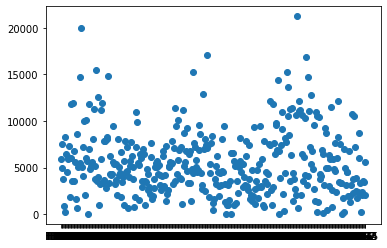

In [ ]:
import matplotlib.pyplot as plt
x = np.array(column_names)
y = np.array(df_window_count)
plt.scatter(x, y)
plt.show()

# **Extracting Hist1**

Hist1 region

In [ ]:
df_hist = df[(df['chrom']=='chr13') & (df['start']>= 21700000) & (df['stop']<= 24100000)]
print(df_hist)

       chrom     start      stop  F10A2  F10A3  F10A4  F10A5  F10A6  F10B1  \
69715  chr13  21720000  21750000      0      1      0      0      0      0   
69716  chr13  21750000  21780000      0      1      0      0      0      0   
69717  chr13  21780000  21810000      0      0      0      0      0      0   
69718  chr13  21810000  21840000      0      1      0      0      0      0   
69719  chr13  21840000  21870000      0      0      0      0      0      0   
...      ...       ...       ...    ...    ...    ...    ...    ...    ...   
69789  chr13  23940000  23970000      0      1      0      0      0      0   
69790  chr13  23970000  24000000      0      0      0      0      0      0   
69791  chr13  24000000  24030000      0      0      0      0      0      0   
69792  chr13  24030000  24060000      0      0      0      0      0      0   
69793  chr13  24060000  24090000      0      1      0      0      0      0   

       F10B2  ...  F9F2  F9F3  F9F4  F9F5  F9F6  F9G1  F9G2  F9

Removing Nps that don't see Hist1
(NPs that contain at least one window)

In [ ]:
hist_data = df_hist.loc[:, (df_hist != 0).any(axis=0)]
hist_data = hist_data.drop(["chrom","start","stop"],axis=1)
hist_data

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
69715,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
69716,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
69717,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
69718,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
69719,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69789,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,1,1,0,0,0
69790,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
69791,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
69792,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,1,1,1,0,0


Column count

In [ ]:
df_hist_window_count = hist_data.sum(axis=0)
print(df_hist_window_count)
print(df_hist_window_count.mean())
print(df_hist_window_count.min())
print(df_hist_window_count.max())

Row count

In [ ]:
df_hist_np_count = hist_data.sum(axis=1)
print(df_hist_np_count)
print(df_hist_np_count.mean())
print(df_hist_np_count.min())
print(df_hist_np_count.max())


In [ ]:
hist_row_index = list(hist_data.index)
hist_column_name = list(hist_data.columns)
len(hist_column_name)

162

Radial position of hist1

In [ ]:
count = [0,0,0,0,0]
radial_position = ["strongly apical","somewhat apical","neither apical nor equatorial","somewhat equatorial","strongly equatorial"]
for item in hist_column_name:
  if item in dict['Key1']:
    print(item,radial_position[0])
    count[0] += 1
  elif item in dict['Key2']:
    print(item,radial_position[1])
    count[1] += 1
  elif item in dict['Key3']:
    print(item,radial_position[2])
    count[2] += 1
  elif item in dict['Key4']:
    print(item,radial_position[3])
    count[3] += 1
  elif item in dict['Key5']:
    print(item,radial_position[4])
    count[4] += 1


F10A3 somewhat equatorial
F10A5 somewhat apical
F10B3 somewhat equatorial
F10B5 somewhat equatorial
F10C1 somewhat equatorial
F10C3 strongly equatorial
F10C4 somewhat equatorial
F10D1 strongly equatorial
F10D5 neither apical nor equatorial
F10E3 neither apical nor equatorial
F10E5 strongly equatorial
F10F1 strongly equatorial
F10F3 somewhat apical
F10F5 strongly equatorial
F10G2 somewhat equatorial
F11A3 neither apical nor equatorial
F11A6 neither apical nor equatorial
F11B1 strongly equatorial
F11B2 strongly equatorial
F11B5 strongly equatorial
F11C2 strongly equatorial
F11D1 strongly equatorial
F11D2 somewhat equatorial
F11D4 somewhat apical
F11G3 strongly equatorial
F11G4 neither apical nor equatorial
F12B1 somewhat apical
F12B2 strongly apical
F12B3 strongly equatorial
F12C6 somewhat apical
F12D4 somewhat apical
F12E1 strongly equatorial
F12E4 somewhat equatorial
F12E5 neither apical nor equatorial
F12E6 strongly apical
F12F1 somewhat apical
F12F5 somewhat equatorial
F12G1 neither 

In [ ]:
count[0]+count[1]+count[2]+count[3]+count[4]

162

Most common radial position of hist1

In [ ]:
radial_position[count.index(max(count))]

'strongly equatorial'

Compactions in hist1


In [ ]:
count_compaction = [0,0,0,0,0,0,0,0,0,0]
compaction_position = ["compaction1","compaction2","compaction3","compaction4","compaction5","compaction6","compaction7","compaction8","compaction9","compaction10"]
for item in hist_row_index:
  if item in dict_compaction[1]:
    print(item,compaction_position[0])
    count_compaction[0] += 1
  elif item in dict_compaction[2]:
    print(item,compaction_position[1])
    count_compaction[1] += 1
  elif item in dict_compaction[3]:
    print(item,compaction_position[2])
    count_compaction[2] += 1
  elif item in dict_compaction[4]:
    print(item,compaction_position[3])
    count_compaction[3] += 1
  elif item in dict_compaction[5]:
    print(item,compaction_position[4])
    count_compaction[4] += 1
  elif item in dict_compaction[6]:
    print(item,compaction_position[5])
    count_compaction[5] += 1
  elif item in dict_compaction[7]:
    print(item,compaction_position[6])
    count_compaction[6] += 1
  elif item in dict_compaction[8]:
    print(item,compaction_position[7])
    count_compaction[7] += 1
  elif item in dict_compaction[9]:
    print(item,compaction_position[8])
    count_compaction[8] += 1
  elif item in dict_compaction[10]:
    print(item,compaction_position[9])
    count_compaction[9] += 1

69715 compaction7
69716 compaction9
69717 compaction10
69718 compaction8
69719 compaction6
69720 compaction6
69721 compaction4
69722 compaction7
69723 compaction10
69724 compaction9
69725 compaction10
69726 compaction10
69727 compaction7
69728 compaction6
69729 compaction7
69730 compaction5
69731 compaction1
69732 compaction4
69733 compaction8
69734 compaction8
69735 compaction9
69736 compaction8
69737 compaction7
69738 compaction10
69739 compaction4
69740 compaction5
69741 compaction9
69742 compaction7
69743 compaction9
69744 compaction9
69745 compaction9
69746 compaction9
69747 compaction7
69748 compaction8
69749 compaction9
69750 compaction5
69751 compaction5
69752 compaction9
69753 compaction2
69754 compaction5
69755 compaction9
69756 compaction10
69757 compaction1
69758 compaction1
69759 compaction1
69760 compaction8
69761 compaction9
69762 compaction7
69763 compaction8
69764 compaction8
69765 compaction6
69766 compaction7
69767 compaction7
69768 compaction7
69769 compaction7
6977

In [ ]:
compaction_position[count_compaction.index(max(count_compaction))]

'compaction9'

# **Calculating Jaccard similarity**

In [ ]:
rows = 162
cols = 162


j_matrix = np.zeros((rows, cols))

for x in range(162):

  for y in range(x+1, 162):

    j_value = 0
    dict_mvalues = {'M11':0,'M10':0,'M01':0}

    for z in range(79):

      if ((hist_data.iat[z,x] == 1) and (hist_data.iat[z,y] == 1)):
        dict_mvalues['M11'] += 1;

      elif ((hist_data.iat[z,x] == 1) and (hist_data.iat[z,y] == 0)):
        dict_mvalues['M10'] += 1;

      elif ((hist_data.iat[z,x] == 0) and (hist_data.iat[z,y] == 1)):
        dict_mvalues['M01'] += 1;



    j_value = ((dict_mvalues['M11'])/(dict_mvalues['M11']+dict_mvalues['M10']+dict_mvalues['M01']))

    j_matrix[x][y] = j_value




In [ ]:
for i in range(rows):
    for j in range(i, cols):
        j_matrix[j][i] = j_matrix[i][j]

j_matrix[np.diag_indices_from(j_matrix)] = 1
print(np.matrix(j_matrix))

[[1.         0.025      0.         ... 0.31034483 0.26923077 0.27906977]
 [0.025      1.         0.         ... 0.         0.03846154 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.31034483 0.         0.         ... 1.         0.19230769 0.10869565]
 [0.26923077 0.03846154 0.         ... 0.19230769 1.         0.17142857]
 [0.27906977 0.         0.         ... 0.10869565 0.17142857 1.        ]]


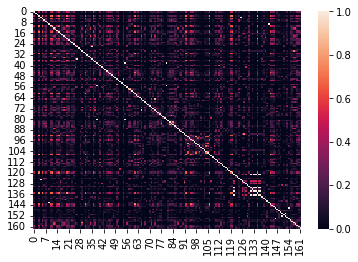

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dataplot=sns.heatmap(j_matrix)
plt.show()

Calculating Jaccard distance

In [ ]:
dist_matrix = np.empty((rows, cols))
for i in range(rows):
    for j in range(cols):
        dist_matrix[i][j] = 1-j_matrix[i][j]

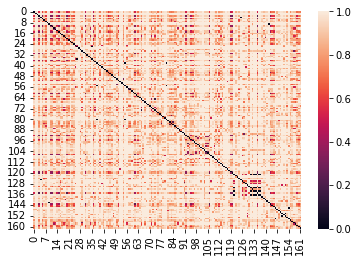

In [ ]:
dataplot=sns.heatmap(dist_matrix)
plt.show()

# **Applying K-means clustering**

In [ ]:
njd_matrix = np.zeros((rows, cols)) #zero matrix of size 162*162

for x in range(rows):

  for y in range(x+1, cols):

    count_m = 0

    for z in range(79):

      if ((hist_data.iat[z,x] == 1) and (hist_data.iat[z,y] == 1)):
        count_m += 1;

    njd_matrix[x][y] = ((count_m)/min(df_hist_window_count[x],df_hist_window_count[y]))

In [ ]:
for i in range(rows):
    for j in range(i, cols):
        njd_matrix[j][i] = njd_matrix[i][j]
print(np.matrix(njd_matrix))

[[0.         1.         0.         ... 0.5        0.53846154 0.8       ]
 [1.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.5        0.         0.         ... 0.         0.38461538 0.33333333]
 [0.53846154 1.         0.         ... 0.38461538 0.         0.4       ]
 [0.8        0.         0.         ... 0.33333333 0.4        0.        ]]


In [ ]:
count_k=3
centroids = list(np.random.choice(hist_column_name,count_k))
print(centroids)

['F5A4', 'F9D6', 'F5D1']


Clustering

In [ ]:
for t in range(200):
  dict_cluster = {centroids[0]:[],centroids[1]:[],centroids[2]:[]}
  cluster1 = hist_column_name.index(centroids[0])
  cluster2 = hist_column_name.index(centroids[1])
  cluster3 = hist_column_name.index(centroids[2])
  for np_value in hist_column_name:
    if np_value not in centroids:

      np_index = hist_column_name.index(np_value)

      if(njd_matrix[np_index][cluster1] >= njd_matrix[np_index][cluster2] and njd_matrix[np_index][cluster1] >= njd_matrix[np_index][cluster3]):
        dict_cluster[centroids[0]].append(np_value)

      elif(njd_matrix[np_index][cluster2] > njd_matrix[np_index][cluster1] and njd_matrix[np_index][cluster2] >= njd_matrix[np_index][cluster3]):
        dict_cluster[centroids[1]].append(np_value)

      else:
        dict_cluster[centroids[2]].append(np_value)

  cluster_1 = list(dict_cluster[centroids[0]])
  cluster_1.append(centroids[0])

  cluster_2 = list(dict_cluster[centroids[1]])
  cluster_2.append(centroids[1])

  cluster_3 = list(dict_cluster[centroids[2]])
  cluster_3.append(centroids[2])

  def max_similarity_index(lst):
      max_similarity_sum = float('-inf')
      max_similarity_index = -1
      for i in range(len(lst)):
          similarity_sum = 0
          for j in range(len(lst)):
              if i != j:
                  similarity_sum += njd_matrix[i][j]
          if similarity_sum > max_similarity_sum:
              max_similarity_sum = similarity_sum
              max_similarity_index = i
      return max_similarity_index

  centroids_new = [0,0,0]
  centroids_new[0] = cluster_1[max_similarity_index(cluster_1)]
  centroids_new[1] = cluster_2[max_similarity_index(cluster_2)]
  centroids_new[2] = cluster_3[max_similarity_index(cluster_3)]

  if centroids_new != centroids:
    centroids = centroids_new
  else:
    break




In [ ]:
keys = list(dict_cluster.keys())
print(dict_cluster[keys[0]])
print(dict_cluster[keys[1]])
print(dict_cluster[keys[2]])

['F10A3', 'F10A5', 'F10B3', 'F10C1', 'F10C4', 'F10D5', 'F11A6', 'F11D2', 'F11G4', 'F12B1', 'F12B2', 'F12B3', 'F12D4', 'F12E4', 'F12F1', 'F15A6', 'F15B5', 'F15C6', 'F15C8', 'F15D1', 'F15D2', 'F15E1', 'F15E2', 'F15E4', 'F15F1', 'F15F3', 'F15H1', 'F15H5', 'F16A4', 'F16A5', 'F16B1', 'F16B2', 'F16B3', 'F16C1', 'F16F4', 'F16G3', 'F16G4', 'F17B7', 'F17C7', 'F17F5', 'F17G3', 'F17G5', 'F18D2', 'F18E1', 'F5A2', 'F5A4', 'F5B2', 'F5B4', 'F5C1', 'F5C2', 'F5E2', 'F5F2', 'F6A4', 'F6B2', 'F6B4', 'F6C2', 'F6E2', 'F6F2', 'F6G2', 'F7A3', 'F7B2', 'F7B5', 'F7B6', 'F7C1', 'F7C2', 'F7D2', 'F7D3', 'F7D4', 'F7D6', 'F7E6', 'F7F2', 'F7F6', 'F7G2', 'F8B2', 'F8B5', 'F8D3', 'F8D4', 'F8E6', 'F8G1', 'F9A2', 'F9A3', 'F9A4', 'F9A5', 'F9B4', 'F9G3']
['F10E3', 'F10E5', 'F10F3', 'F10F5', 'F10G2', 'F11B1', 'F11B5', 'F11C2', 'F11D4', 'F11G3', 'F12C6', 'F12E1', 'F12E5', 'F12F5', 'F12G1', 'F15A3', 'F15A5', 'F15C5', 'F15E5', 'F15E7', 'F15F5', 'F15F6', 'F15F8', 'F16A2', 'F16D6', 'F17A7', 'F17B1', 'F17C1', 'F17C2', 'F17D6', 'F17

Variance

In [ ]:
for key, val in dict_cluster.items():
  sum = 0
  index_row = hist_column_name.index(key)
  for item_1 in val:
    index_column = hist_column_name.index(item_1)
    sum += (1-njd_matrix[index_row][index_column])
  if(len(dict_cluster[key])!=0):
    val = (sum/float(len(dict_cluster[key])))
  print("cluster score "+str(val))


cluster score 0.09668538721574099
cluster score 0.10718502205098394
cluster score 0.08701298701298703
